In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Load data
data = pd.read_csv('crawl.csv', header=None, sep='\t')
data.columns = ['Site', 'Brand', 'Product']
data.head()

,Site,Brand,Product
0,https://www.musinsa.com/app/goods/2118292,KIRSH,아치 로고 리워크드 스웻셔츠 KA [블랙]
1,https://www.musinsa.com/app/goods/3353701,NASTY FANCY CLUB,[NF] 러프 셔링 후드 베스트 (NAVY)_F23QB469
2,https://www.musinsa.com/app/goods/3263407,NASTY FANCY CLUB,[NF] 팬브릿지 크롭 티 (WHITE)_F23QB224
3,https://www.musinsa.com/app/goods/3296909,NASTY FANCY CLUB,[NF] 페어 크롭 카라 저지 (YELLOW)_F23QB253
4,https://www.musinsa.com/app/goods/3263399,NASTY FANCY CLUB,[NF] 타이다이 리본 레이어드 티 (WHITE)_F23QB486


This is data from a platform that makes clothes on Korean websites accessible for foreigners\
The data shows products, their brands, and which sites they are from.

### How many clothes have been sold for each brand?

In [43]:
# Count the values
Brand_counts = data['Brand'].value_counts()
# Print top 10
print(Brand_counts.head(10))

CODEGRAPHY    42
FALLETT       30
MARITHE       29
OIOI          28
CARLYN        28
COVERNAT      22
WHATITISNT    20
AVANDRESS     19
WOOALONG      19
SCULPTOR      19
Name: Brand, dtype: int64


### How many clothes have been sold in each site?

In [44]:
# Make the values from the same sites identical
for index, a in enumerate(data['Site']):
    parts = a.split('/')
    data.loc[index, 'Site'] = parts[2]

data.head()

,Site,Brand,Product
0,www.musinsa.com,KIRSH,아치 로고 리워크드 스웻셔츠 KA [블랙]
1,www.musinsa.com,NASTY FANCY CLUB,[NF] 러프 셔링 후드 베스트 (NAVY)_F23QB469
2,www.musinsa.com,NASTY FANCY CLUB,[NF] 팬브릿지 크롭 티 (WHITE)_F23QB224
3,www.musinsa.com,NASTY FANCY CLUB,[NF] 페어 크롭 카라 저지 (YELLOW)_F23QB253
4,www.musinsa.com,NASTY FANCY CLUB,[NF] 타이다이 리본 레이어드 티 (WHITE)_F23QB486


In [45]:
# Count the values
Site_counts = data['Site'].value_counts()
print(Site_counts)

www.musinsa.com         561
musinsaapp.page.link    164
product.29cm.co.kr       45
marithe-official.com     29
www.carlynmall.com       27
Name: Site, dtype: int64


Text(0, 0.5, 'Number of clothes sold')

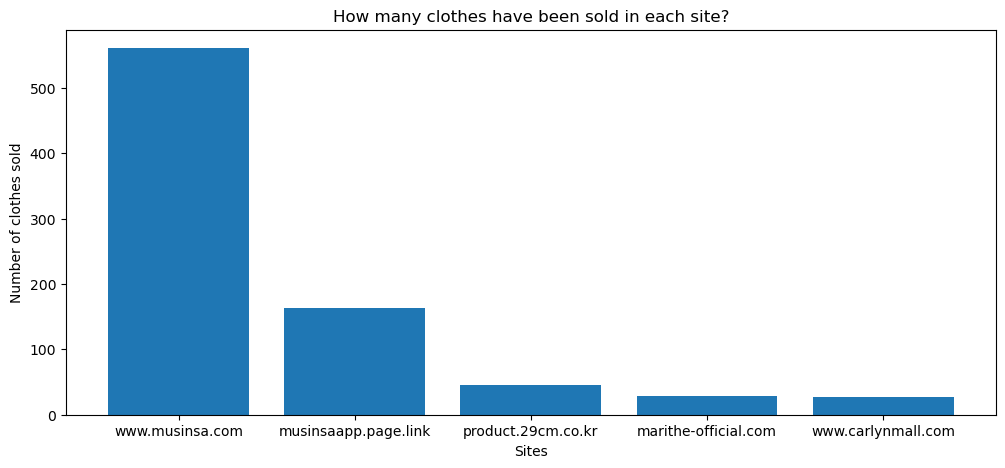

In [46]:
plt.figure(figsize=(12,5))
plt.bar(Site_counts.index, Site_counts.values)
plt.title('How many clothes have been sold in each site?')
plt.xlabel('Sites')
plt.ylabel('Number of clothes sold')

### Export the modified data

In [29]:
data.to_csv('crawl_modified.csv', index=False)